In [ ]:
#Assignment(Lab02) :

#1) Perform all data preprocessing tasks and feature selection on "Exercise-CarData.csv"


from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np


drive.mount("/content/drive")
dataset = pd.read_csv("/content/drive/MyDrive/Machine_Learning/Exercise-CarData-New.csv")

# print(dataset)

dataset.replace('????' , np.nan , inplace = True)
dataset.dropna(axis=0 , how='all' , inplace=True)

# dataset.info()

X = dataset.iloc[: , 2:]
y = dataset.iloc[: , 1]
# print(X)
# print(y)

#Age , FuelType , MetColor

dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
# cnt = dataset['FuelType'].nunique()
# print(cnt)

dataset['KM'] = pd.to_numeric(dataset['KM'] , errors='coerce')
# print(dataset.iloc[6: , :4].values)

imputer = SimpleImputer(missing_values=np.nan , strategy="most_frequent")
imputer = imputer.fit(dataset)

dataset = imputer.transform(dataset)
dataset[7: , :5]
# print(dataset)





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([[7, 18600, 30.0, 75889.0, 'Petrol'],
       [8, 21500, 27.0, 19700.0, 'Petrol'],
       [9, 12950, 23.0, 71138.0, 'Diesel'],
       ...,
       [1433, 8500, 55.67215568862275, 17016.0, 'Petrol'],
       [1434, 7250, 70.0, 1.0, 'Petrol'],
       [1435, 6950, 76.0, 1.0, 'Petrol']], dtype=object)

In [ ]:
#Practical :


#1 . Data Pre processing :

from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

#Handle Missing Values in dataset :

dataset = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Lab02/Data_for_Missing_Values.csv')

X = dataset.iloc[: , :-1].values

y = dataset.iloc[: , -1].values

dataset.dropna(axis=0 , how='all' , inplace=True)
# print(dataset)

updated_df = dataset
updated_df['Age'] = updated_df['Age'].fillna(updated_df['Age'].mean())


updated_df['Salary'] = updated_df['Salary'].fillna(updated_df['Salary'].mean())
# print(updated_df)

new_X = dataset.iloc[: , :-1].values
new_y = dataset.iloc[: , -1].values

#imputation :
imputer = SimpleImputer(missing_values = np.nan , strategy="mean")

imputer = imputer.fit(new_X[: , 1:3])

new_X[: , 1:3] = imputer.transform(new_X[: , 1:3])
# print(new_X)




In [ ]:
#2 . Data Transformation :

from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler


#Handle Missing Values in dataset :

dataset = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Lab02/Data_for_Transformation.csv')

# print(dataset)
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

X_new = dataset.iloc[: , 1:3].values
# print(X_new)

#To get data range between 0-1 We need MinMaxScaler :
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X_new)
# print(X_scaled)

std = StandardScaler()
X_std = std.fit_transform(X_new)

print(X_std)

# Other type of method called RobustScaler :
# Use of RobustScaler : Outliers can negatively influence the standard scaling of an input. Here's why we should use robust scaling instead.
# How far is each data point from the input’s median

# ScaledValue = (OriginalValue - Input's Median)/Input's IQR

# Therefore, both median and IQR are pretty resistant to outliers.

data = np.random.normal(0 , 15 , 30)
data_df = pd.DataFrame({"data" : data})

robust_scaler = RobustScaler()

robust_scaler.fit(data_df)

robust_scaled_data = robust_scaler.transform(data_df)

# Comparing both standard and robust scaled values :

std_scaler = StandardScaler()

std_scaled_data = std_scaler.fit_transform(data_df)

scaled_values = pd.DataFrame({
    'Standard' : std_scaled_data.reshape(-1),
    'Robust' : robust_scaled_data.reshape(-1)
})
print(scaled_values)









[[ 0.68188156  0.79548755]
 [-1.81835082 -1.41513049]
 [-1.37713334 -0.86247598]
 [-0.2005534  -0.21771238]
 [ 0.09359159  0.42705121]
 [-0.64177088 -0.49403964]
 [-0.05348091 -1.04669415]
 [ 1.27017153  1.44025115]
 [ 1.56431652  1.80868749]
 [-0.34762589  0.33494213]
 [ 0.82895405 -0.77036689]]
    Standard    Robust
0  -0.558942 -0.618769
1  -0.197942 -0.300175
2  -0.622169 -0.674569
3  -0.342339 -0.427610
4  -1.601053 -1.538467
5   0.544853  0.355366
6   1.007331  0.763518
7   1.334419  1.052184
8  -1.027261 -1.032077
9  -0.623658 -0.675883
10  0.590126  0.395320
11  0.681192  0.475689
12  0.282969  0.124245
13  1.833459  1.492603
14  0.641040  0.440254
15 -0.178345 -0.282880
16  0.177525  0.031187
17  0.218284  0.067158
18  1.244301  0.972652
19  1.079126  0.826879
20 -0.143287 -0.251940
21 -2.864875 -2.653831
22 -1.462251 -1.415969
23 -0.065527 -0.183314
24  0.544109  0.354709
25  0.257550  0.101812
26 -1.640588 -1.573357
27  0.106850 -0.031187
28 -0.244482 -0.341248
29  1.029583

In [ ]:
# 3 . Handling Categorical Data :


from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

#Handle Missing Values in dataset :

dataset = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Lab02/Data_for_Categorical_Values.csv')

# print(dataset)

X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

le = LabelEncoder()
X[: , 0] = le.fit_transform(X[: , 0])
# print(X)


# Method : 1(Implementing LabelEncoding)
dummy = pd.get_dummies(dataset['Country'])
# print(dummy)

# dataset = dataset.drop(['Country' , 'Purchased'] , axis=1)
# dataset = pd.concat([dummy , dataset] , axis=1)
# print(dataset)

#Method : 2(for same)
onehotencoder = OneHotEncoder()

X = onehotencoder.fit_transform(dataset.Country.values.reshape(-1 , 1)).toarray()
# print(X)
dfOneHot = pd.DataFrame(X , columns=["Country_" + str(int(i)) for i in range(dataset.shape[1]-1)])

df = pd.concat([dataset , dfOneHot] , axis=1)
df = df.drop(['Country'] , axis=1)
print(df.head())



   Age  Salary Purchased  Country_0  Country_1  Country_2
0   44   72000        No        1.0        0.0        0.0
1   27   48000       Yes        0.0        0.0        1.0
2   30   54000        No        0.0        1.0        0.0
3   38   61000        No        0.0        0.0        1.0
4   40   68000       Yes        0.0        1.0        0.0


<Axes: >

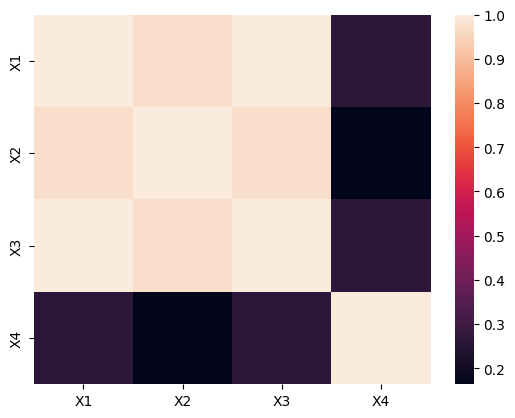

In [ ]:
#4.Correlation :
import seaborn as sns
import pandas as pd
import numpy as np


dataset = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Lab02/Data_for_Correlation.csv')
# dataset.head()

dataset = dataset.iloc[: , :-1]

corr = dataset.corr()
# corr.head()

sns.heatmap(corr)

#removing one of two features that have a correlation higher than 0.9

columns = np.full((corr.shape[0] , ) , True , dtype=bool)

for i in range(corr.shape[0]):
  for j in range(i+1 , corr.shape[0]):
    if corr.iloc[i , j] >= 0.9
      if columns[j]:
        columns[j] = False

selected_columns = data.columns[columns]
selecte


